# Example Notebook for Louvain

In [1]:
from pickle import load
from src.viz import viz_partition
from src.scores import truncated_boost
from src.clustering import louvain_partition_signed_graph

Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'bayanpy', 'wurlitzer', 'graph_tool'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'ASLPAw'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'wurlitzer'}


## Import the data

In [2]:
with open('./data/Portland_D4.pkl', 'rb') as file:
    loaded = load(file)
boost_d4 = loaded['boost']
profile_D4 = loaded['profile']

In [10]:
from src.scores import fast_adj, proportional_successive_matrix
adj = fast_adj(profile_D4)
PSM = proportional_successive_matrix(profile_D4)
TOP3 = truncated_boost(profile_D4, 3)

## Standard Modularity

In [ ]:
# Let's start with standard modularity (green only!) on boost matrix
part_green_diag, mod_green_diag = louvain_partition_signed_graph(boost_d4, profile_D4, score = 'green_diagonal')

In [5]:
mod_green_diag

np.float64(0.4043403746618411)

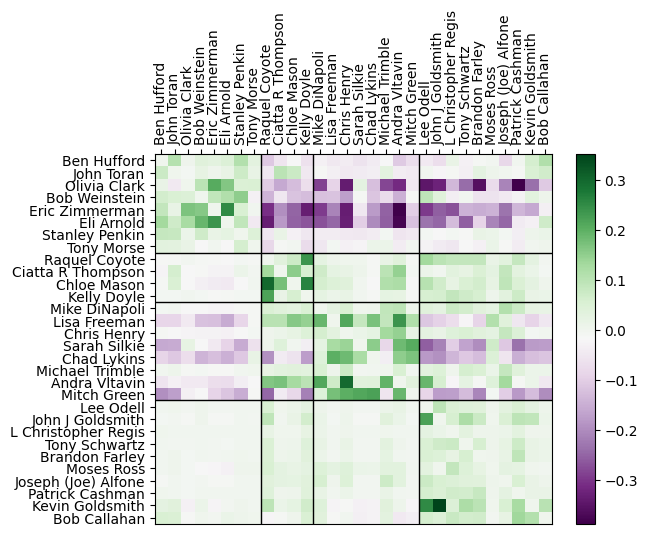

In [6]:
viz_partition(part_green_diag, boost_d4, list(profile_D4.candidates))

In [7]:
# What about standard modularity on adjacency
part_green_diag_adj, mod_green_diag_adj = louvain_partition_signed_graph(adj, profile_D4, score = 'green_diagonal')

In [8]:
mod_green_diag_adj

np.float64(0.12341443149860681)

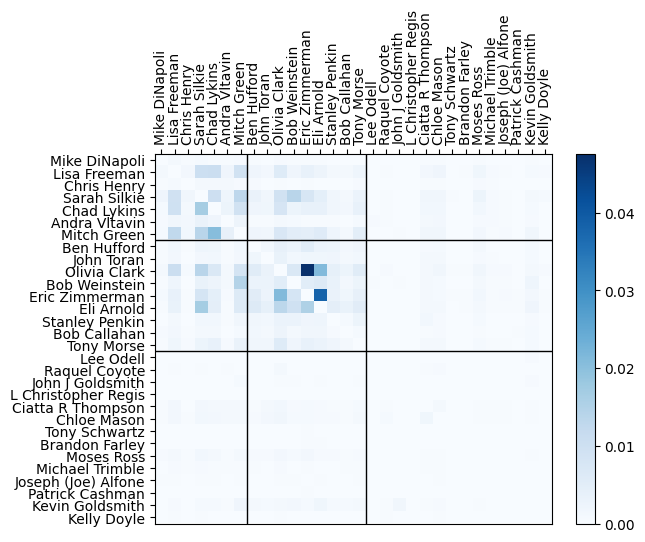

In [9]:
viz_partition(part_green_diag_adj, adj, list(profile_D4.candidates), cmap = "Blues")

What if we only consider the top 3 candidates in each ballot?

In [11]:
part_green_diag_top3, mod_green_diag_top3 = louvain_partition_signed_graph(TOP3, profile_D4, score = 'green_diagonal')

In [13]:
# notice thst this is not directly comparable with full profile modularity!
mod_green_diag_top3

np.float64(0.4791600028458559)

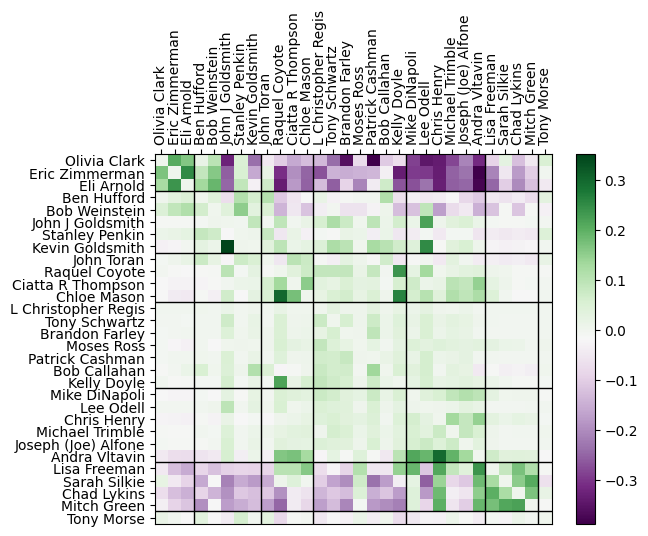

In [14]:
viz_partition(part_green_diag_top3, boost_d4, list(profile_D4.candidates))

In [35]:
part_stand_PSM, stand_modularity_psm = louvain_partition_signed_graph(PSM, profile_D4, score = 'green_diagonal')

In [37]:
stand_modularity_psm

np.float64(0.09276557541897235)

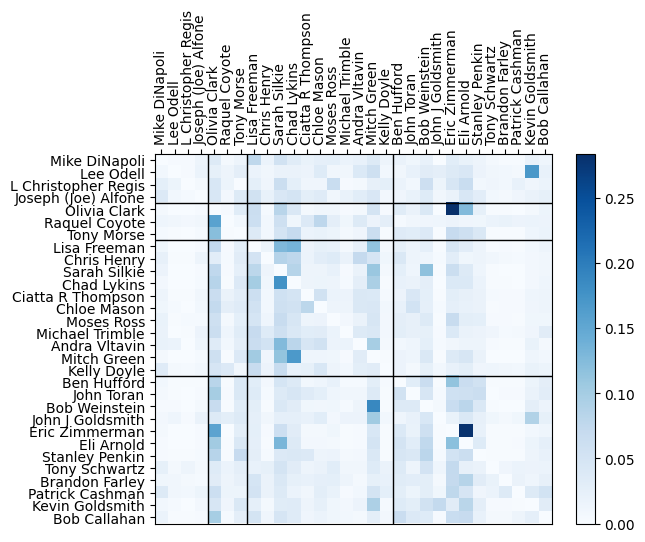

In [36]:
viz_partition(part_stand_PSM, PSM, list(profile_D4.candidates), cmap = 'Blues')

we can also visualize the best partition obtained by PSM on boost!

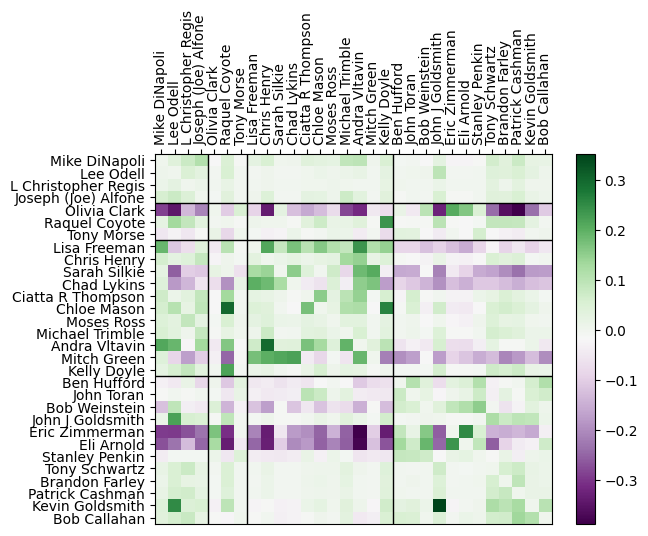

In [40]:
viz_partition(part_stand_PSM, boost_d4, list(profile_D4.candidates))

## Hybrid Modularity
Here we consider standard modularity on the positive boost, and modularity on the negative boost.
Let's start with hybrid modularity on the top 3 candidates

In [26]:
part_hybrid_top3, mod_hybrid_top3 = louvain_partition_signed_graph(TOP3, profile_D4, score = 'hybrid', resolution = 1)

In [27]:
mod_hybrid_top3

np.float64(0.37495883804397173)

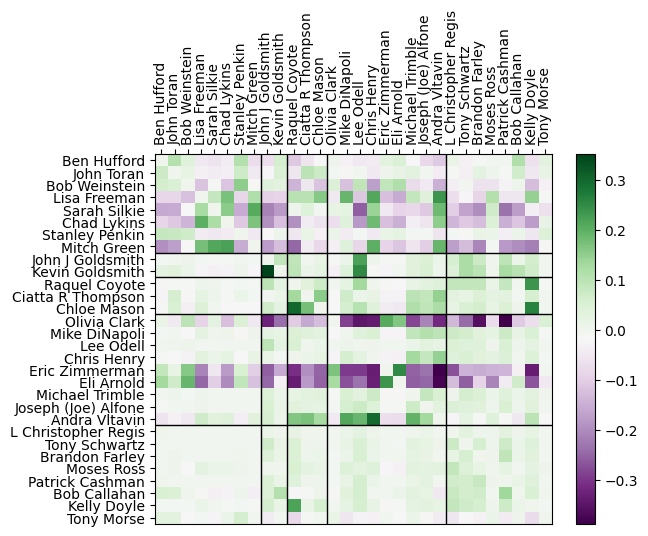

In [28]:
viz_partition(part_hybrid_top3, boost_d4, list(profile_D4.candidates))

What if we consider the entire profile?

In [29]:
part_hybrid, hybrid_modularity = louvain_partition_signed_graph(boost_d4, profile_D4, score = 'hybrid')

In [33]:
hybrid_modularity

np.float64(0.28154295701019943)

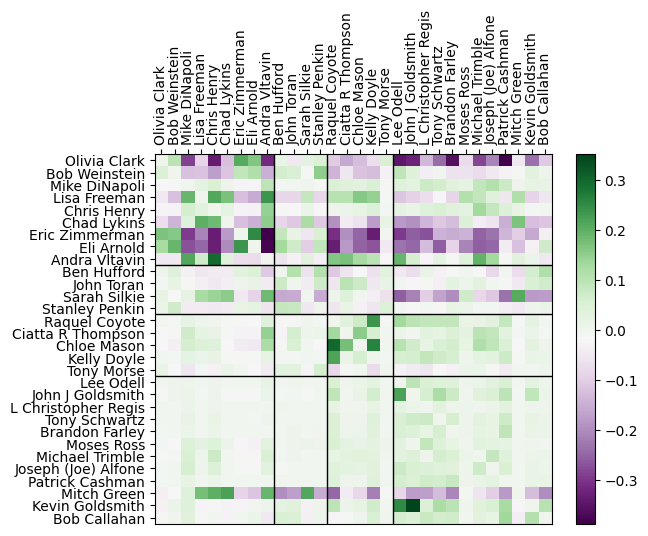

In [34]:
viz_partition(part_hybrid, boost_d4, list(profile_D4.candidates))